<a href="https://colab.research.google.com/github/Mahsabeigi33/predict_price_market/blob/main/predict_market_netfilix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dataset
data= pd.read_csv('Netflix.csv')

print(data)

            Open        High         Low       Close   Adj Close       Volume  \
0       1.156429    1.242857    1.145714    1.196429    1.196429  104790000.0   
1       1.214286    1.225000    1.197143    1.210000    1.210000   11104800.0   
2       1.213571    1.232143    1.157143    1.157143    1.157143    6609400.0   
3       1.164286    1.164286    1.085714    1.103571    1.103571    6757800.0   
4       1.107857    1.107857    1.071429    1.071429    1.071429   10154200.0   
...          ...         ...         ...         ...         ...          ...   
5236  287.339996  299.239990  285.329987  293.510010  293.510010    6292400.0   
5237  295.970001  297.450012  290.309998  294.940002  294.940002    5956700.0   
5238  292.510010  306.309998  292.279999  303.790008  303.790008    9215300.0   
5239  304.750000  316.600006  301.709992  310.059998  310.059998    7903700.0   
5240  310.059998  310.760010  300.000000  303.500000  303.500000    6912100.0   

           Date  
0     5/2

In [ ]:
df=data
df.shape

(5241, 7)

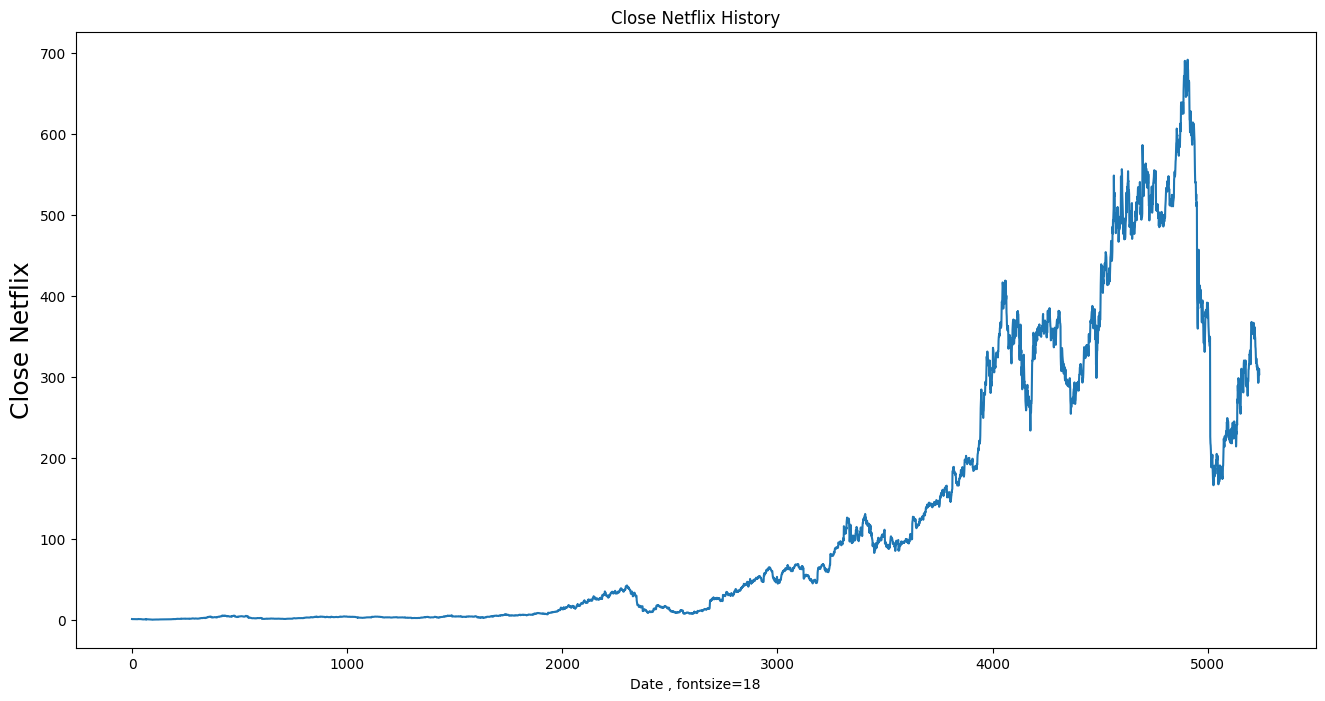

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Netflix History')
plt.plot(df['Close'])
plt.xlabel('Date , fontsize=18')
plt.ylabel('Close Netflix', fontsize=18)
plt.show()

In [ ]:
# creat the 'Close Cloumn'
data=df.filter(['Close'])
print(data)
# convert to numpy
dataset=data.values
print(dataset.shape)
# the number of rows to be trained
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

           Close
0       1.196429
1       1.210000
2       1.157143
3       1.103571
4       1.071429
...          ...
5236  293.510010
5237  294.940002
5238  303.790008
5239  310.059998
5240  303.500000

[5241 rows x 1 columns]
(5241, 1)


4193

In [ ]:
# scale the data
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)

print(scaled_data.shape)

(5241, 1)


<Axes: >

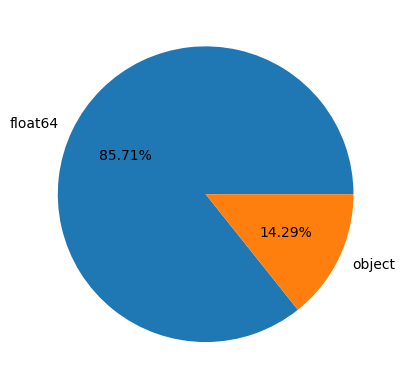

In [ ]:
df.dtypes.value_counts().plot.pie(autopct='%0.2f%%')

<ipython-input-15-62439767fdd3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True)


<Axes: >

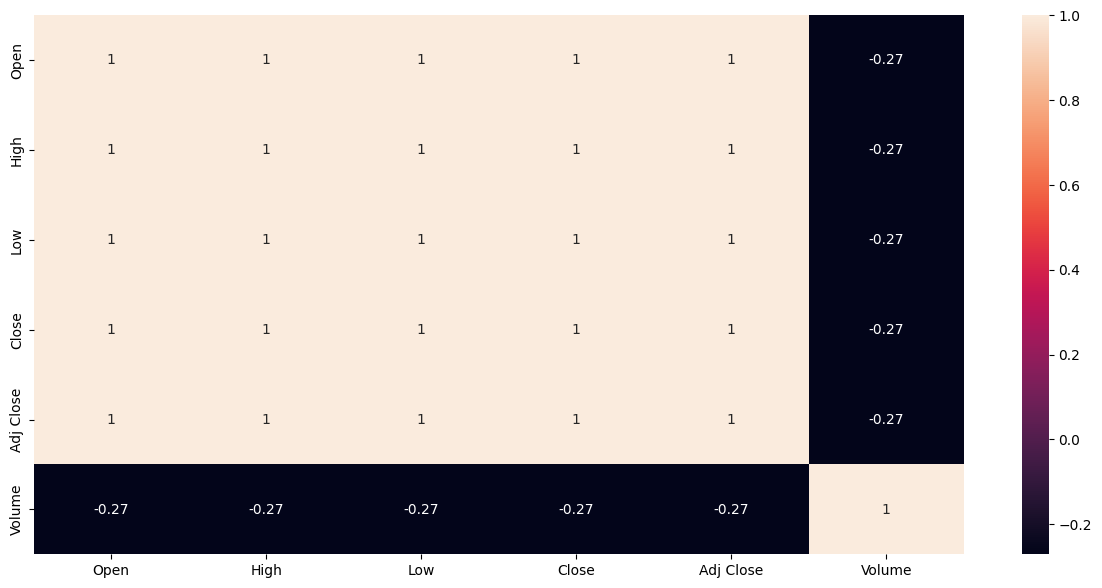

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),cbar=True,annot=True)

In [ ]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999849,0.999848,0.999674,0.999674,-0.269093
High,0.999849,1.000000,0.999806,0.999855,0.999855,-0.267993
Low,0.999848,0.999806,1.000000,0.999845,0.999845,-0.270732
Close,0.999674,0.999855,0.999845,1.000000,1.000000,-0.269073
Adj Close,0.999674,0.999855,0.999845,1.000000,1.000000,-0.268968
Volume,-0.269093,-0.267993,-0.270732,-0.269073,-0.268968,1.000000


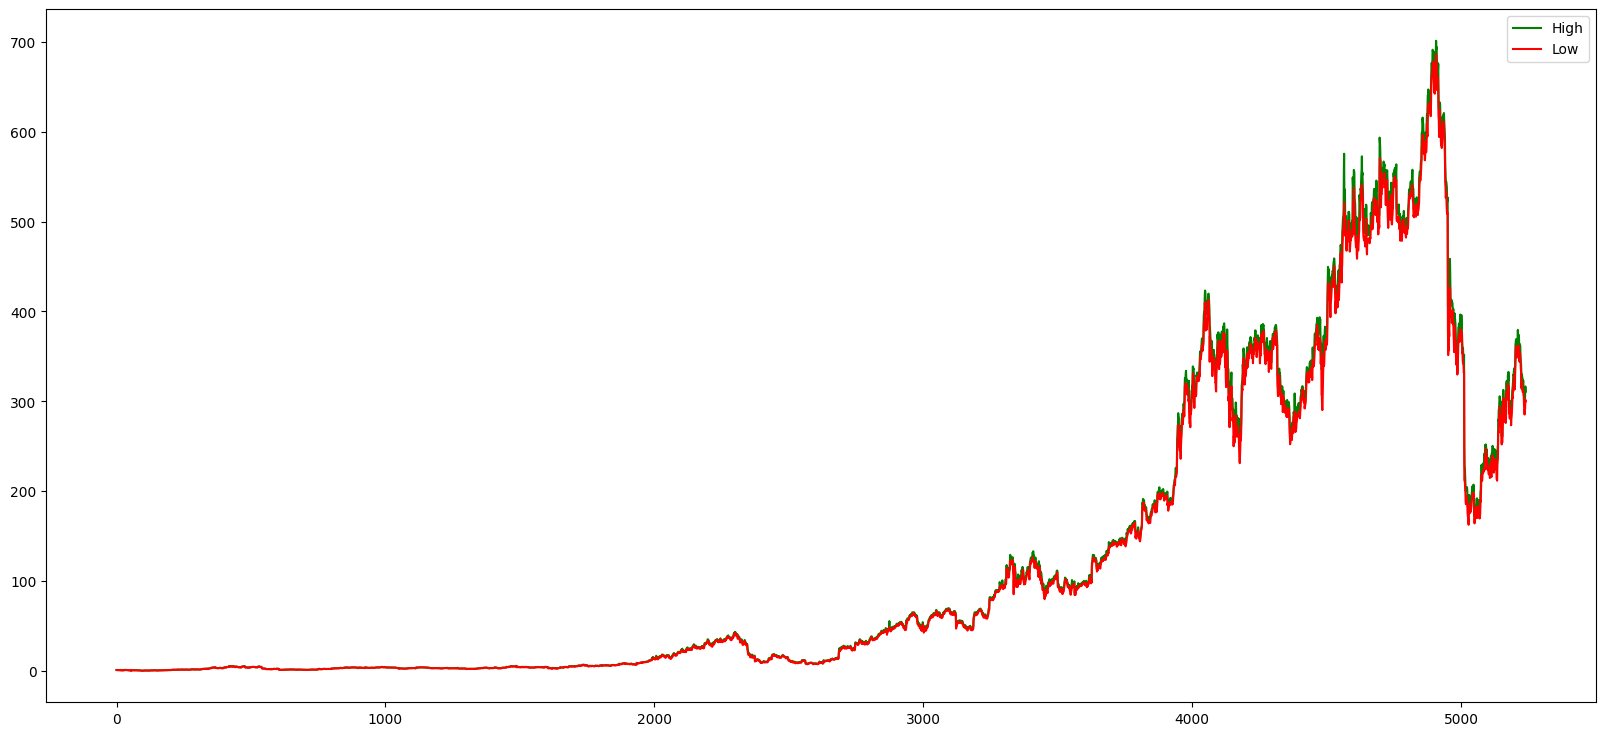

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(df['High'], color='g', label = 'High')
plt.plot(df['Low'], color='r', label = 'Low')

plt.legend()
plt.show()

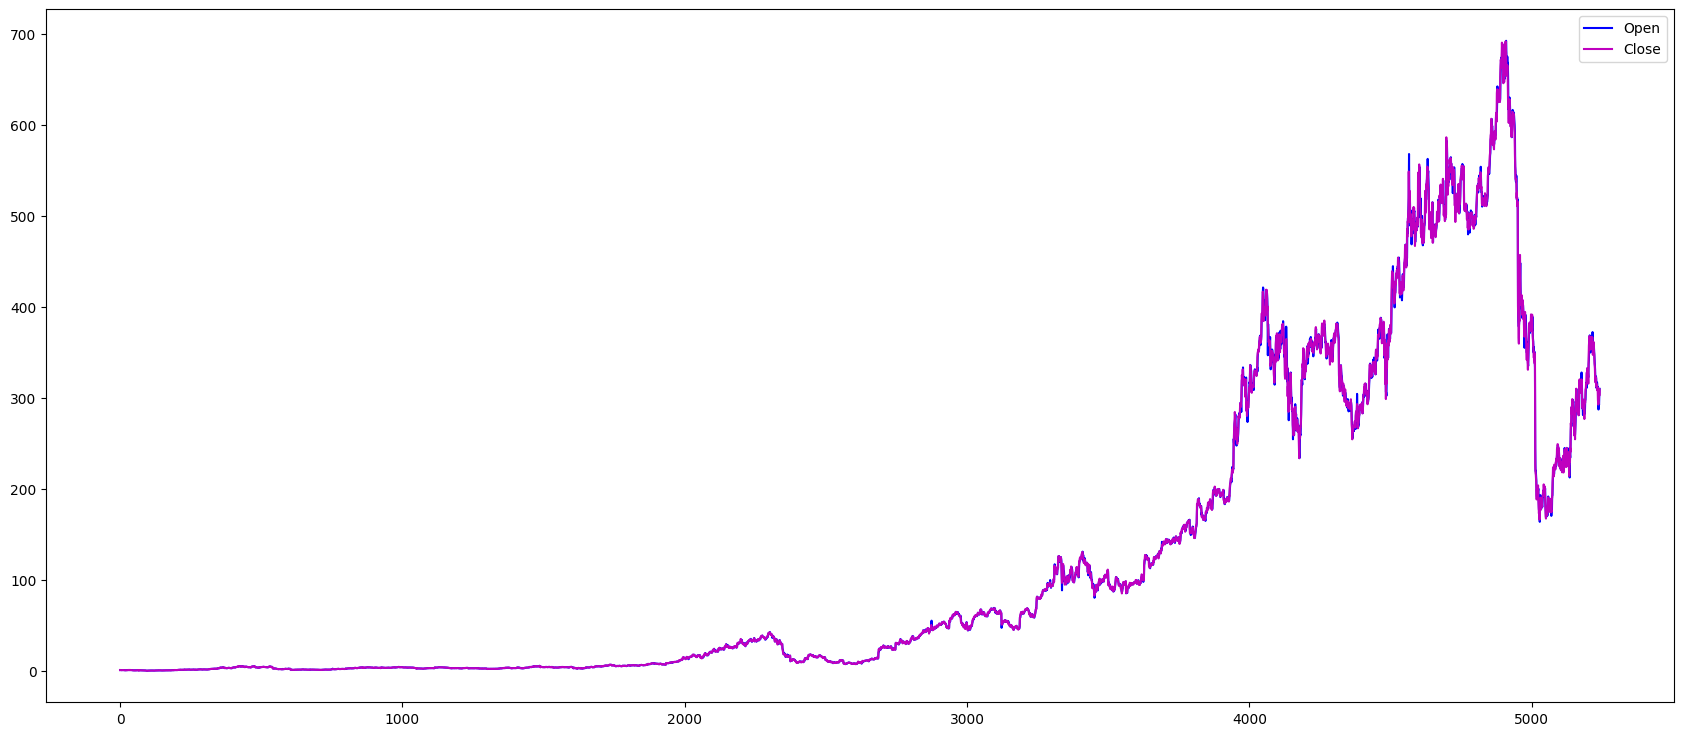

In [ ]:
plt.figure(figsize=(21,9))
plt.plot(df['Open'], color='b', label = 'Open')
plt.plot(df['Close'], color='m', label = 'Close')
plt.legend()
plt.show()

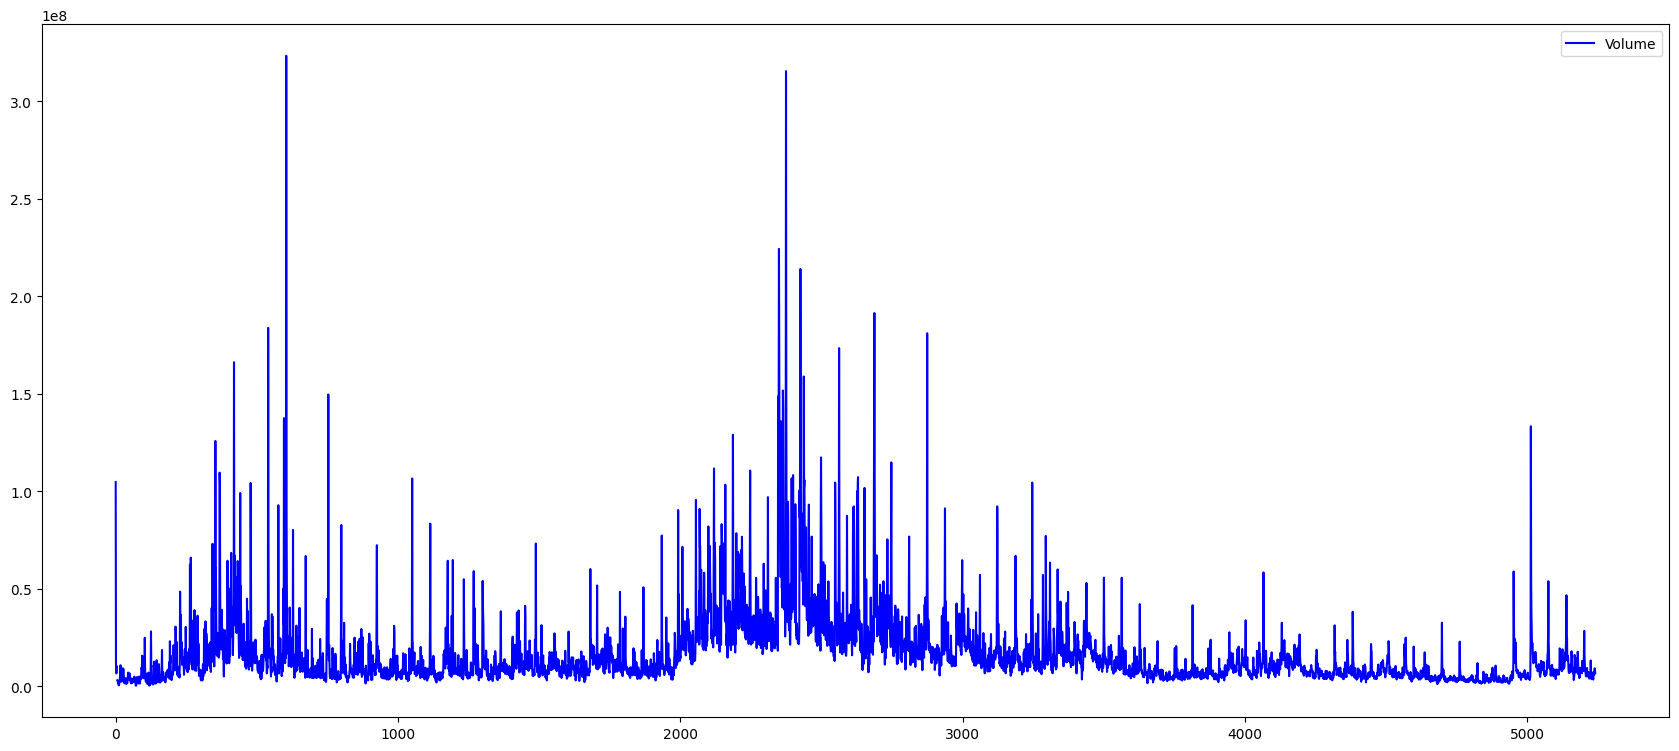

In [ ]:
plt.figure(figsize=(21,9))
plt.plot(df['Volume'], color='b', label = 'Volume')
plt.legend()
plt.show()

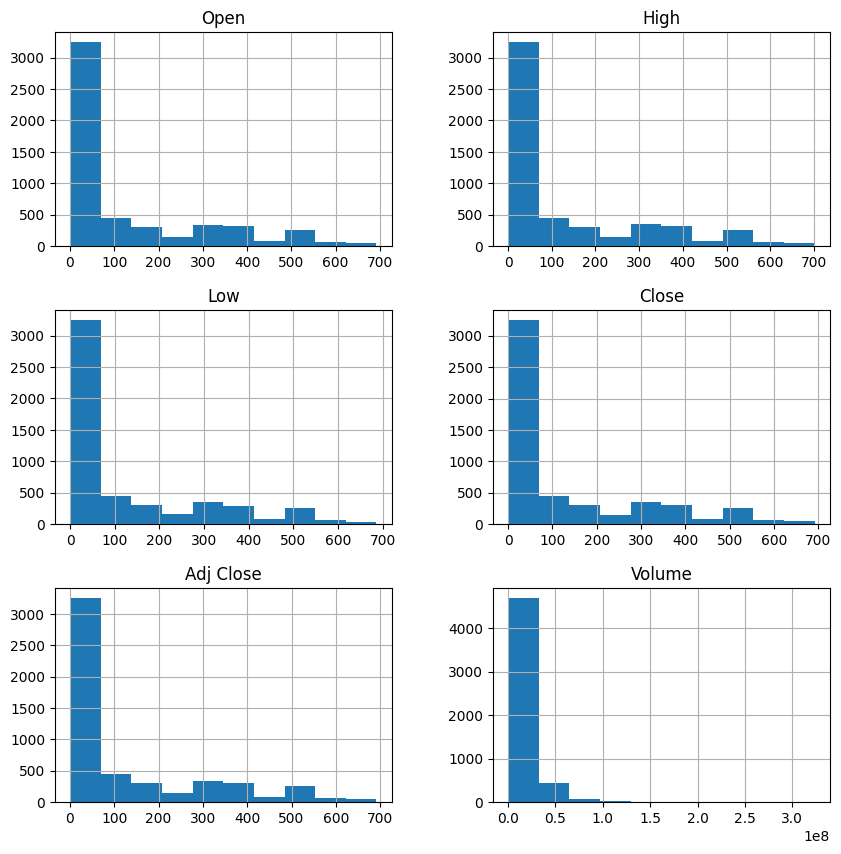

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

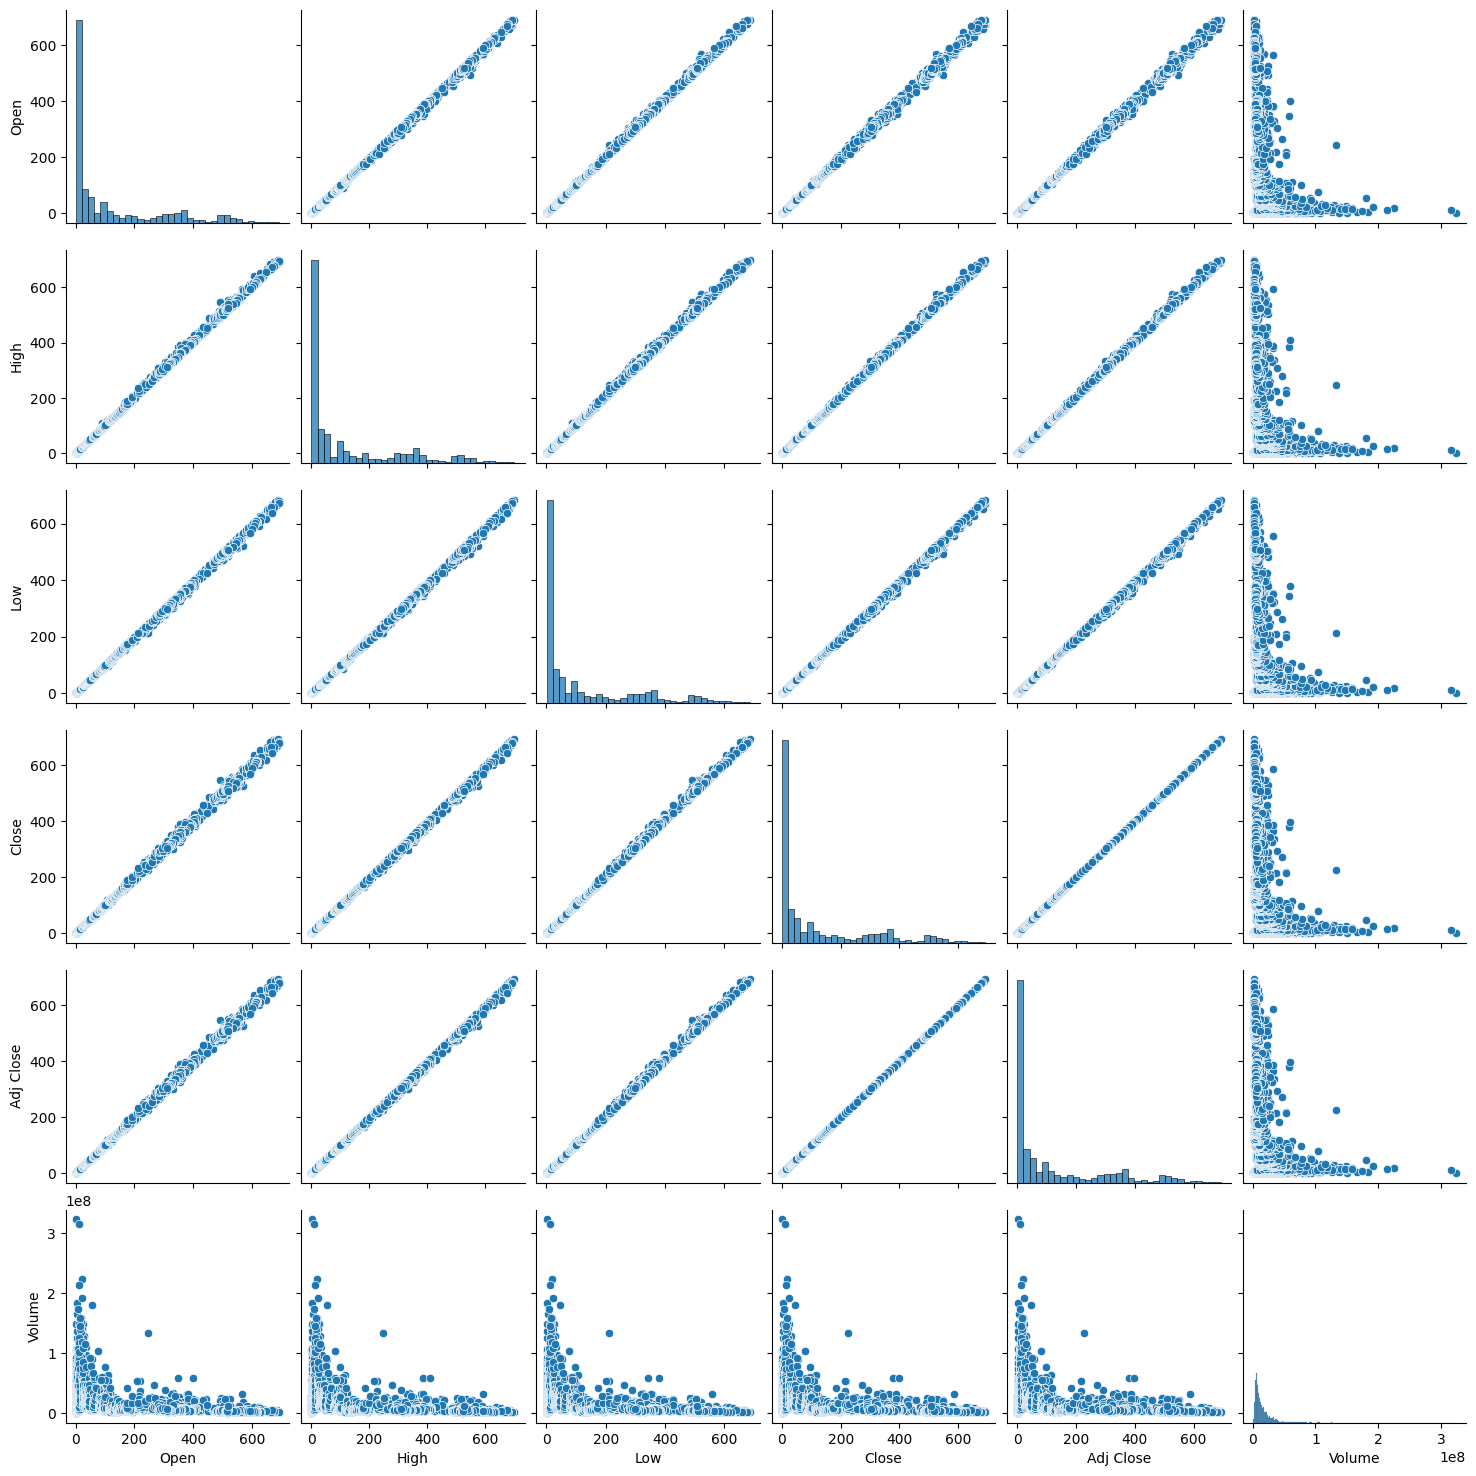

In [ ]:
sns.pairplot(df)

In [ ]:
mean_value= df['Adj Close'].rolling(50).mean()

In [ ]:
print(mean_value)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5236    333.4184
5237    333.4948
5238    333.6730
5239    333.9752
5240    333.8570
Name: Adj Close, Length: 5241, dtype: float64


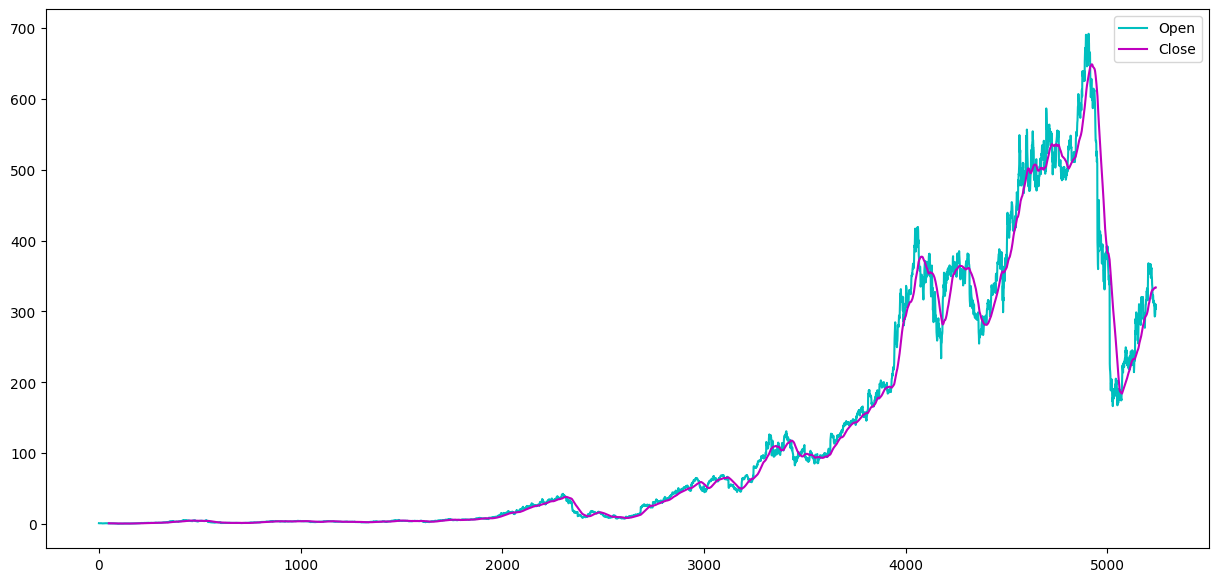

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df['Adj Close'], color='c', label = 'Open')
plt.plot(ma, color='m', label = 'Close')
plt.legend()
plt.show()

In [ ]:
ema = df['Adj Close'].ewm(com=1.5).mean()

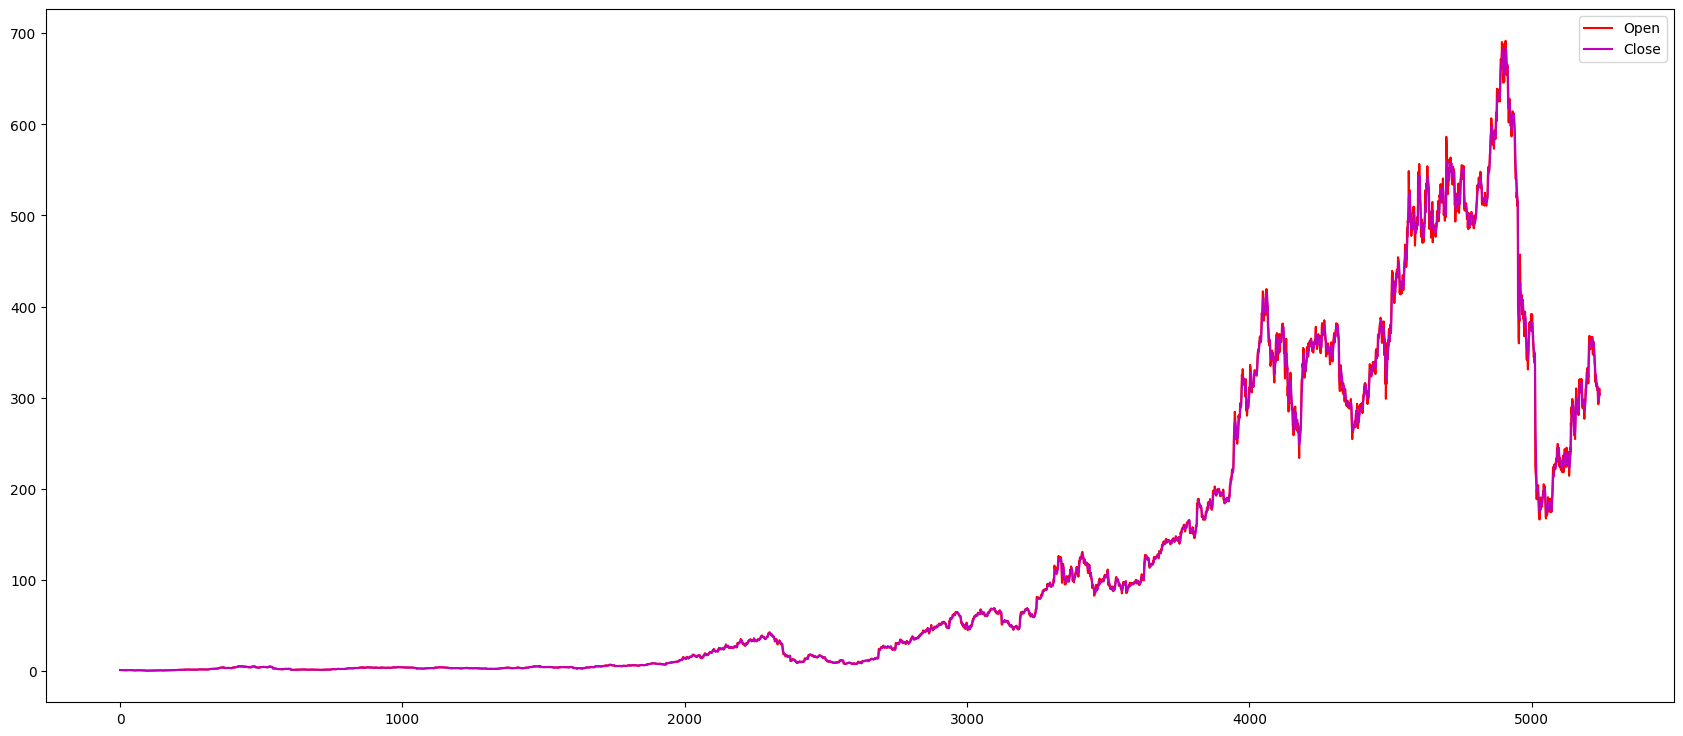

In [ ]:
plt.figure(figsize=(21,9))
plt.plot(df['Adj Close'], color='r', label = 'Open')
plt.plot(ema, color='m', label = 'Close')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
# X = feature column
result = adfuller(df['Adj Close'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.191392744448107
n_lags: 0.6772873329860044
p-value: 0.6772873329860044
Critial Values:
   1%, -3.431606486780679
Critial Values:
   5%, -2.8620952361461405
Critial Values:
   10%, -2.5670655520388137


In [ ]:
df['Daily Return'] = df['Adj Close'].pct_change()

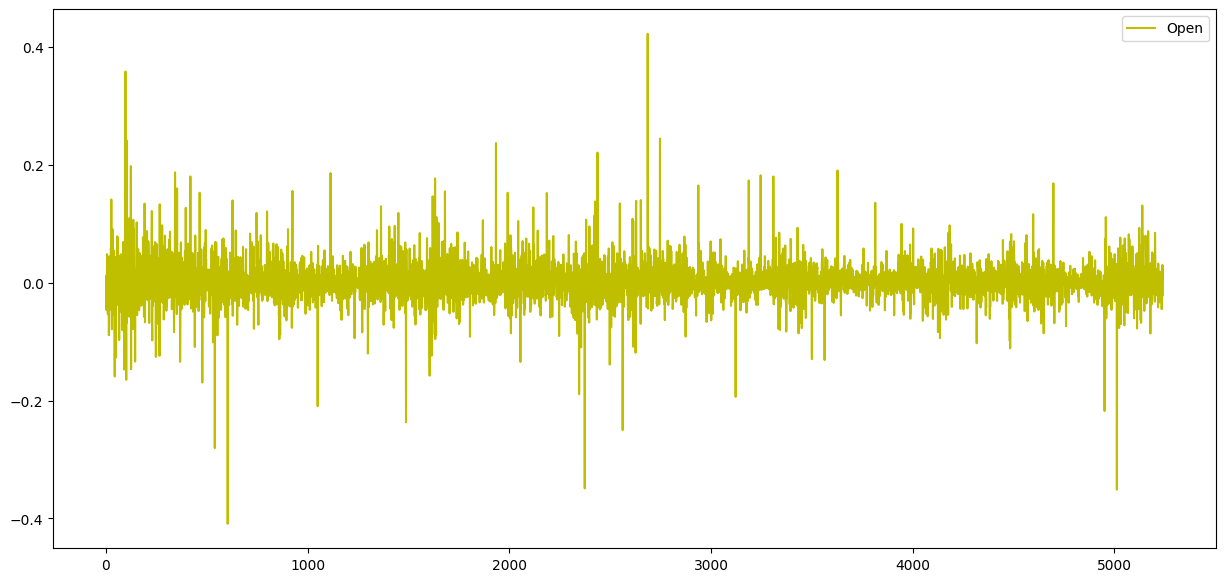

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df['Daily Return'], color='y', label = 'Open')
plt.legend()
plt.show()

Text(0, 0.5, 'Daily Return')

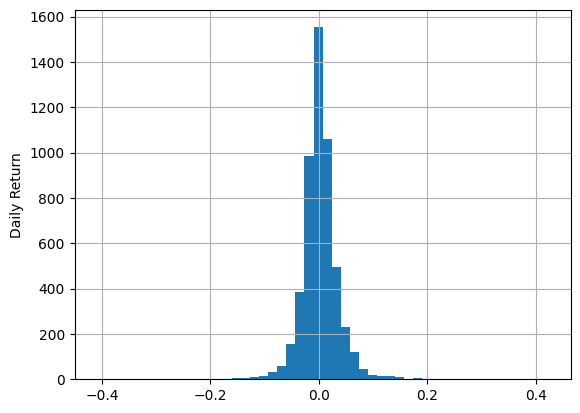

In [ ]:
df['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')

In [ ]:
df.ffill()

,Open,High,Low,Close,Adj Close,Volume,Date,Daily Return
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,5/23/2002,NaN
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,5/24/2002,0.011343
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,5/28/2002,-0.043684
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,5/29/2002,-0.046297
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,5/30/2002,-0.029125
...,...,...,...,...,...,...,...,...
5236,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,3/13/2023,0.002562
5237,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,3/14/2023,0.004872
5238,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,3/15/2023,0.030006
5239,304.750000,316.600006,301.709992,310.059998,310.059998,7903700.0,3/16/2023,0.020639


In [ ]:
df.bfill()

,Open,High,Low,Close,Adj Close,Volume,Date,Daily Return
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,5/23/2002,0.011343
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,5/24/2002,0.011343
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,5/28/2002,-0.043684
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,5/29/2002,-0.046297
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,5/30/2002,-0.029125
...,...,...,...,...,...,...,...,...
5236,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,3/13/2023,0.002562
5237,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,3/14/2023,0.004872
5238,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,3/15/2023,0.030006
5239,304.750000,316.600006,301.709992,310.059998,310.059998,7903700.0,3/16/2023,0.020639


In [ ]:
df.interpolate()

,Open,High,Low,Close,Adj Close,Volume,Date,Daily Return
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,5/23/2002,NaN
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,5/24/2002,0.011343
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,5/28/2002,-0.043684
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,5/29/2002,-0.046297
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,5/30/2002,-0.029125
...,...,...,...,...,...,...,...,...
5236,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,3/13/2023,0.002562
5237,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,3/14/2023,0.004872
5238,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,3/15/2023,0.030006
5239,304.750000,316.600006,301.709992,310.059998,310.059998,7903700.0,3/16/2023,0.020639


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
data = df.groupby(['Date']).sum()
data

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,0.000000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,0.011343
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,-0.043684
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,-0.046297
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,-0.029125
...,...,...,...,...,...,...,...
2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,0.002562
2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,0.004872
2023-03-15,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,0.030006


In [ ]:
data1 = df.set_index('Date')
data2 = data

In [ ]:
data1.loc[data1.index.intersection(data2.index)]

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,NaN
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,0.011343
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,-0.043684
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,-0.046297
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,-0.029125
...,...,...,...,...,...,...,...
2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,0.002562
2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,0.004872
2023-03-15,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,0.030006


In [ ]:
df1_new = data1.loc[data1.index.intersection(data2.index)]
df2_new = data2.loc[data2.index.intersection(data1.index)]

In [ ]:
total = pd.concat([df1_new, df2_new], axis = 1)

In [ ]:
total

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,NaN,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,0.000000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,0.011343,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,0.011343
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,-0.043684,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,-0.043684
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,-0.046297,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,-0.046297
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,-0.029125,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,-0.029125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,0.002562,287.339996,299.239990,285.329987,293.510010,293.510010,6292400.0,0.002562
2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,0.004872,295.970001,297.450012,290.309998,294.940002,294.940002,5956700.0,0.004872
2023-03-15,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,0.030006,292.510010,306.309998,292.279999,303.790008,303.790008,9215300.0,0.030006
